In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp # for reference

import autograd.numpy as np
from neuralsolver import NNSolver

# Problem Definition

In [3]:
# define ODE problem
# Lotka–Volterra equations

a = 1.
b = 0.1
c = 1.5
d = 0.75

def f(t, y):
    # du/dt = au -buv
    # dv/dt = -cv + dbu*v
    # http://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html
    return [a*y[0] - b*y[0]*y[1], -c*y[1]+d*b*y[0]*y[1]]

t = np.linspace(0, 15, 20).reshape(-1, 1) #training points

y0_list = [5, 10] # number of prey and predactor respectively

# Reference solution

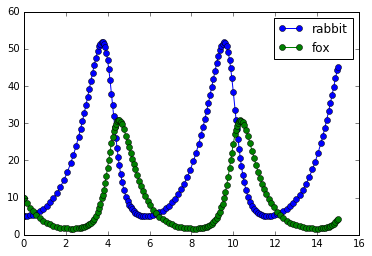

In [4]:
# reference solution using scipy package
sol = solve_ivp(f, [t.min(), t.max()], y0_list, method='Radau', rtol=1e-5)
plt.plot(sol.t, sol.y[0], marker='o', label='rabbit')
plt.plot(sol.t, sol.y[1], marker='o', label='fox')
plt.legend()

# Neural Net Training

In [5]:
nn = NNSolver(f, t, y0_list, n_hidden=20)
nn

Neural ODE Solver 
Number of equations:       2 
Initial condition y0:      [5, 10] 
Numnber of hidden units:   20 
Number of training points: 20 

In [6]:
nn.reset_weights()
%time nn.train(maxiter=1000, iprint=100)

iteration: 0 loss:  248608.134642
iteration: 100 loss:  0.00179009807443
iteration: 200 loss:  5.42648034047e-05
iteration: 300 loss:  5.30152123678e-06
iteration: 400 loss:  2.84982943688e-06
iteration: 500 loss:  3.45787994933e-07
iteration: 600 loss:  1.80709848925e-07
iteration: 700 loss:  1.49234520703e-07
iteration: 800 loss:  4.155071617e-08
iteration: 900 loss:  2.55566046984e-08
         Current function value: 0.000000
         Iterations: 1000
         Function evaluations: 1128
         Gradient evaluations: 1128
CPU times: user 10.5 s, sys: 80.4 ms, total: 10.6 s
Wall time: 10.7 s


# Verifying training set

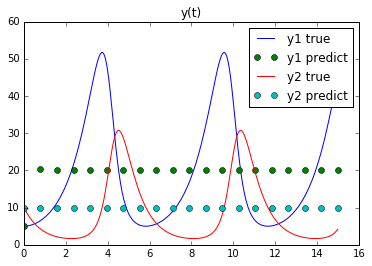

In [7]:
y_pred_list, dydt_pred_list = nn.predict()
# scipy sol
plt.plot(sol.t, sol.y[0], label='y1 true')
# nn soln
plt.plot(t, y_pred_list[0], 'o', label='y1 predict')

plt.plot(sol.t, sol.y[1], label='y2 true')
plt.plot(t, y_pred_list[1], 'o', label='y2 predict')

plt.legend()
plt.title('y(t)')